In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats
rng = np.random.default_rng()
sn.set_style('whitegrid')

In [142]:
all_words_and_measures = pd.read_excel('/Users/Nick/Downloads/gpt_wordcombo_pythontest.xlsx')
all_words_and_measures = all_words_and_measures.round(decimals=2)
all_words_and_measures['Stim'] = 'the ' + all_words_and_measures['Stim'].str.replace('-', ' ')
all_words_and_measures['Difference Score'] = abs(all_words_and_measures['Mean_rate'] - all_words_and_measures['GPT rate'])
all_words_and_measures.head(10)

C:\Users\Nick\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Stim,Class,Mean_rate,SD,N,GPT rate,EAT,USF,Both,LSA,Numletts,Gfrqs,Log_gfrqs,W1frq,W2frq,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,Difference Score
0,the bag body,-1,0.93,1.15,28,0.0,0.0,0,0.0,0.05,7,4959,3.70,1122,5243,6365,3.05,3.72,6.77,0.93
1,the butt tongue,-1,0.38,0.90,29,0.0,NaN,0,0.0,0.09,10,207,2.32,121,602,723,2.08,2.78,4.86,0.38
2,the car cattle,-1,0.61,0.99,28,0.0,0.0,0,0.0,0.03,9,110,2.05,4944,568,5512,3.69,2.75,6.45,0.61
3,the car railroad,-1,0.86,1.08,28,0.0,0.0,0,0.0,0.12,11,325,2.51,4944,117,5061,3.69,2.07,5.76,0.86
4,the corpse lizard,-1,1.21,1.26,29,0.0,0.0,0,0.0,0.03,12,0,0.00,186,32,218,2.27,1.51,3.77,1.21
5,the duck blood,1,2.71,1.49,28,0.0,0.0,0,0.0,0.02,9,1480,3.17,174,2536,2710,2.24,3.40,5.64,2.71
6,the ear elephant,-1,0.79,0.88,28,0.0,0.0,0,0.0,0.08,11,749,2.88,751,226,977,2.88,2.35,5.23,0.79
7,the engine chess,-1,0.14,0.45,28,0.0,0.0,0,0.0,0.01,11,0,0.00,788,264,1052,2.90,2.42,5.32,0.14
8,the flag hurricane,-1,0.28,0.65,29,0.0,0.0,0,0.0,0.10,13,454,2.66,356,64,420,2.55,1.81,4.36,0.28
9,the gun pill,-1,0.14,0.45,28,0.0,0.0,0,0.0,0.06,7,115,2.06,1138,233,1371,3.06,2.37,5.42,0.14


In [143]:
all_words_and_measures.describe().round(decimals=2)

,Class,Mean_rate,SD,N,GPT rate,EAT,Both,LSA,Numletts,Gfrqs,Log_gfrqs,W1frq,W2frq,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,Difference Score
count,969.00,969.00,969.00,969.00,969.00,912.00,963.00,969.00,969.00,969.00,969.00,969.00,969.00,969.00,969.00,969.00,969.00,969.00
mean,-0.01,2.04,1.06,28.34,2.47,0.01,0.02,0.20,9.92,19020.06,3.15,1650.74,1763.17,3413.90,2.88,2.88,5.76,0.92
std,1.00,1.22,0.40,1.06,0.94,0.06,0.06,0.16,2.32,63997.27,1.26,2090.76,2250.89,3079.77,0.59,0.62,0.88,0.67
min,-1.00,0.07,0.00,26.00,0.00,0.00,0.00,-0.03,6.00,0.00,0.00,7.00,9.00,83.00,0.85,0.95,3.21,0.00
25%,-1.00,0.97,0.86,28.00,2.00,0.00,0.00,0.07,8.00,284.00,2.45,282.00,279.00,1153.00,2.45,2.45,5.20,0.41
50%,-1.00,1.68,1.13,28.00,2.00,0.00,0.00,0.15,10.00,1647.00,3.22,832.00,832.00,2278.00,2.92,2.92,5.82,0.86
75%,1.00,3.27,1.33,29.00,3.00,0.00,0.00,0.27,11.00,11359.00,4.06,1905.00,2033.00,4992.00,3.28,3.31,6.38,1.29
max,1.00,4.00,1.85,56.00,4.00,1.00,0.58,0.87,20.00,1109006.00,6.04,8831.00,8831.00,15827.00,3.95,3.95,7.79,3.89


8.698677883543967 0.0


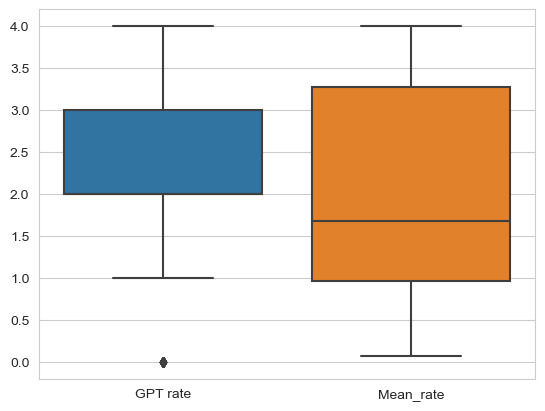

In [144]:
sn.boxplot(data=all_words_and_measures[['GPT rate', 'Mean_rate']],orient='v')
t, p = stats.ttest_ind(all_words_and_measures['GPT rate'], all_words_and_measures['Mean_rate'], permutations=10000, random_state=rng)
print(t, p)

<AxesSubplot:ylabel='Count'>

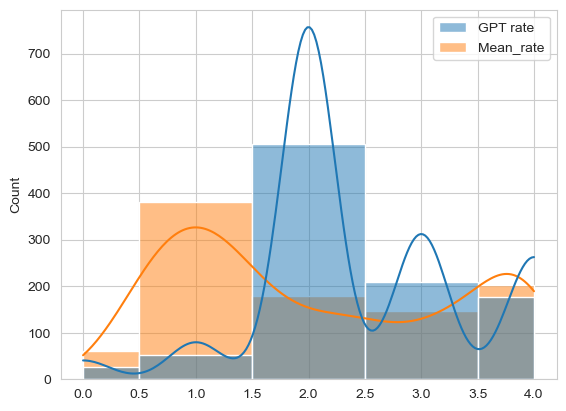

In [145]:
sn.histplot(data=all_words_and_measures[['GPT rate', 'Mean_rate']], bins=[0,.5,1.5,2.5,3.5,4], kde=True)

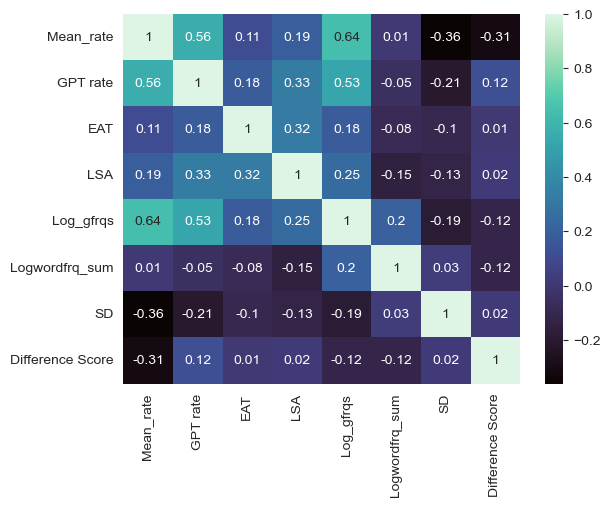

In [146]:
abbrev_measures = all_words_and_measures[['Mean_rate', 'GPT rate', 'EAT', 'LSA', 'USF', 'Log_gfrqs', 'Logwordfrq_sum', 'SD', 'Difference Score']]
corr_mat = abbrev_measures.corr().round(decimals=2)
sn.heatmap(corr_mat, annot=True, cmap='mako')
plt.show()

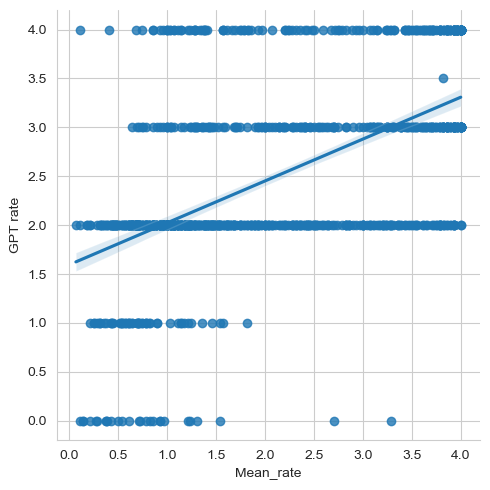

In [147]:
sn.set_style('whitegrid')
sn.lmplot(data=abbrev_measures, x='Mean_rate', y='GPT rate')

In [148]:
forward_combos = all_words_and_measures[all_words_and_measures['Class'] == 1]
forward_combos.head(10)

,Stim,Class,Mean_rate,SD,N,GPT rate,EAT,USF,Both,LSA,Numletts,Gfrqs,Log_gfrqs,W1frq,W2frq,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,Difference Score
5,the duck blood,1,2.71,1.49,28,0.0,0.0,0,0.0,0.02,9,1480,3.17,174,2536,2710,2.24,3.40,5.64,2.71
11,the lizard corpse,1,3.29,1.24,28,0.0,0.0,0,0.0,0.03,12,231,2.37,32,186,218,1.51,2.27,3.77,3.29
16,the pill gun,1,0.93,1.33,29,0.0,0.0,0,0.0,0.06,7,359,2.56,233,1138,1371,2.37,3.06,5.42,0.93
17,the pool dog,1,1.54,1.50,28,0.0,0.0,0,0.0,0.18,7,354,2.55,620,1285,1905,2.79,3.11,5.90,1.54
30,the bed face,1,0.83,1.10,29,1.0,0.0,0,0.0,0.31,7,2234,3.35,4376,8000,12376,3.64,3.90,7.54,0.17
41,the cow ship,1,0.69,1.07,29,1.0,0.0,0,0.0,0.04,7,0,0.00,403,793,1196,2.61,2.90,5.50,0.31
42,the dollar television,1,0.79,1.37,28,1.0,0.0,0,0.0,0.05,16,1168,3.07,263,2033,2296,2.42,3.31,5.73,0.21
56,the magazine plant,1,0.75,1.24,28,1.0,0.0,0,0.0,0.01,13,108,2.04,703,1302,2005,2.85,3.11,5.96,0.25
71,the ship toilet,1,1.54,1.53,28,1.0,0.0,0,0.0,0.05,10,41,1.62,793,415,1208,2.90,2.62,5.52,0.54
84,the baby book,1,3.86,0.59,28,2.0,0.0,0,0.0,0.05,8,41604,4.62,3281,4932,8213,3.52,3.69,7.21,1.86


-0.8473318921587577 0.4012


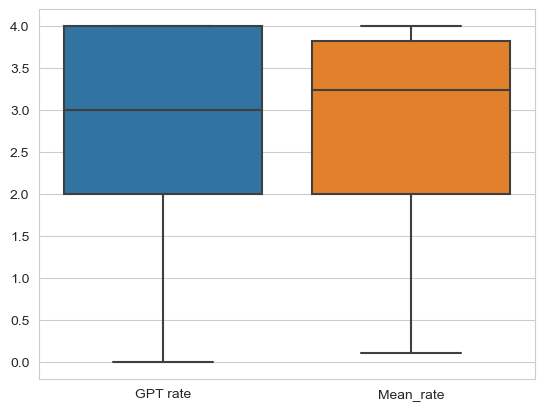

In [149]:
sn.boxplot(data=forward_combos[['GPT rate', 'Mean_rate']],orient='v')
t, p = stats.ttest_ind(forward_combos['GPT rate'], forward_combos['Mean_rate'], permutations=10000, random_state=rng)
print(t, p)

<AxesSubplot:ylabel='Count'>

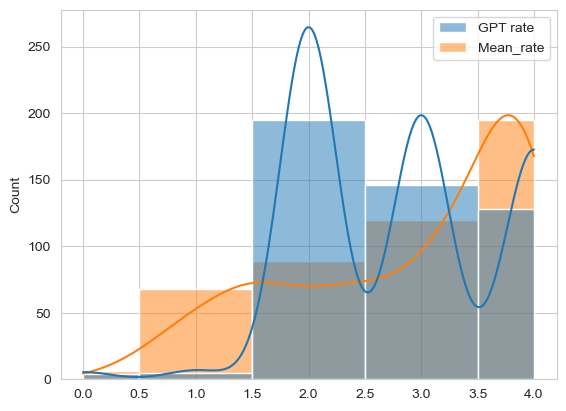

In [150]:
sn.histplot(data=forward_combos[['GPT rate', 'Mean_rate']], bins=[0,.5,1.5,2.5,3.5,4], kde=True)

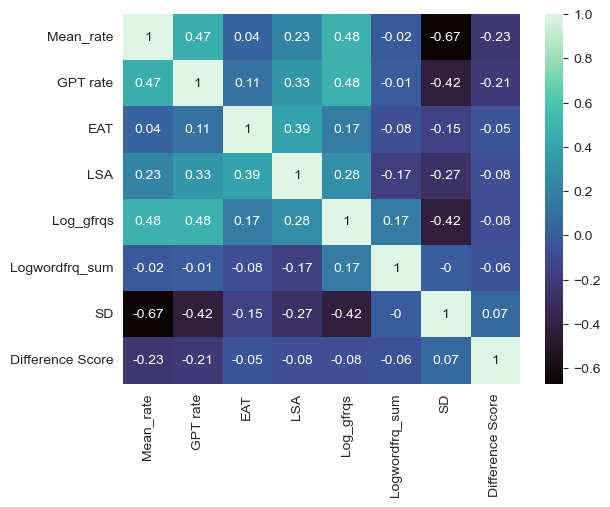

In [151]:
forward_abbrev_measures = forward_combos[['Mean_rate', 'GPT rate', 'EAT', 'LSA', 'USF', 'Log_gfrqs', 'Logwordfrq_sum', 'SD', 'Difference Score']]
corr_mat = forward_abbrev_measures.corr().round(decimals=2)
sn.heatmap(corr_mat, annot=True, cmap='mako')
plt.show()

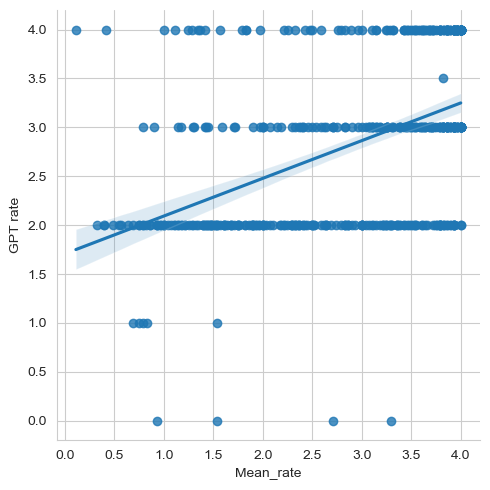

In [152]:
sn.lmplot(data=forward_abbrev_measures, x='Mean_rate', y='GPT rate')

In [153]:
backward_combos = all_words_and_measures[all_words_and_measures['Class'] == -1]
backward_combos.describe().round(decimals=2)

,Class,Mean_rate,SD,N,GPT rate,EAT,Both,LSA,Numletts,Gfrqs,Log_gfrqs,W1frq,W2frq,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,Difference Score
count,491.0,491.00,491.00,491.00,491.00,464.00,489.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00
mean,-1.0,1.23,1.11,28.32,2.13,0.01,0.01,0.19,9.82,2890.36,2.46,1698.84,1614.63,3313.47,2.91,2.83,5.74,1.06
std,0.0,0.74,0.25,0.57,0.89,0.04,0.05,0.16,2.24,12509.48,1.15,2117.31,2165.24,3047.73,0.56,0.63,0.85,0.65
min,-1.0,0.07,0.00,27.00,0.00,0.00,0.00,-0.03,6.00,0.00,0.00,14.00,9.00,83.00,1.15,0.95,3.21,0.00
25%,-1.0,0.70,0.95,28.00,2.00,0.00,0.00,0.07,8.00,110.00,2.05,365.00,242.00,1098.50,2.56,2.38,5.19,0.59
50%,-1.0,1.04,1.12,28.00,2.00,0.00,0.00,0.15,10.00,441.00,2.65,832.00,718.00,2206.00,2.92,2.86,5.78,0.97
75%,-1.0,1.51,1.29,29.00,2.00,0.00,0.00,0.27,11.00,1490.50,3.17,1905.00,1919.00,4564.00,3.28,3.28,6.33,1.36
max,-1.0,4.00,1.64,29.00,4.00,0.35,0.48,0.85,20.00,226131.00,5.35,8831.00,8831.00,15827.00,3.95,3.95,7.79,3.32


17.313383431005246 0.0


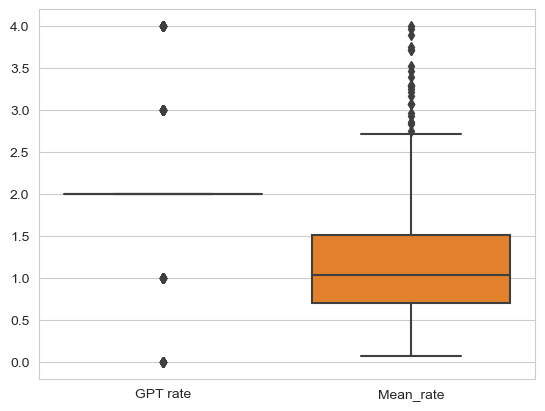

In [154]:
sn.boxplot(data=backward_combos[['GPT rate', 'Mean_rate']],orient='v')
t, p = stats.ttest_ind(backward_combos['GPT rate'], backward_combos['Mean_rate'], permutations=10000, random_state=rng)
print(t, p)

<AxesSubplot:ylabel='Count'>

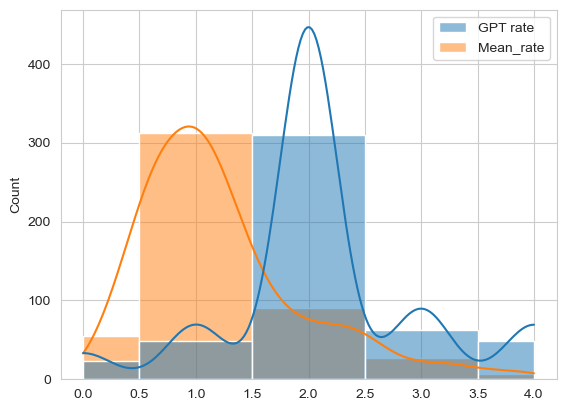

In [155]:
sn.histplot(data=backward_combos[['GPT rate', 'Mean_rate']], bins=[0,.5,1.5,2.5,3.5,4], kde=True)

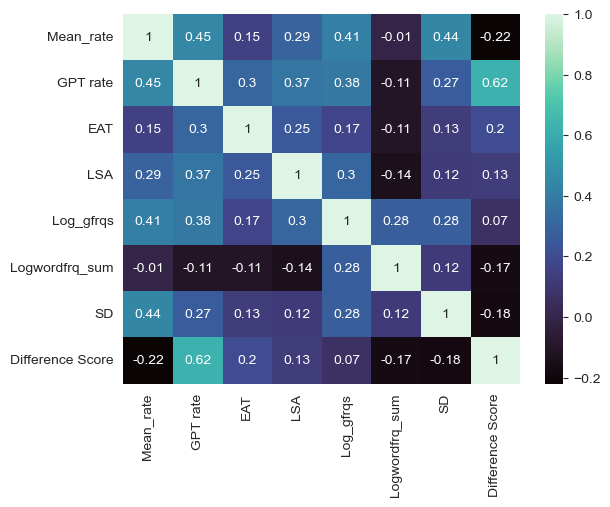

In [156]:
backward_abbrev_measures = backward_combos[['Mean_rate', 'GPT rate', 'EAT', 'LSA', 'USF', 'Log_gfrqs', 'Logwordfrq_sum', 'SD', 'Difference Score']]
backward_corr_mat = backward_abbrev_measures.corr().round(decimals=2)
sn.heatmap(backward_corr_mat, annot=True, cmap='mako')
plt.show()

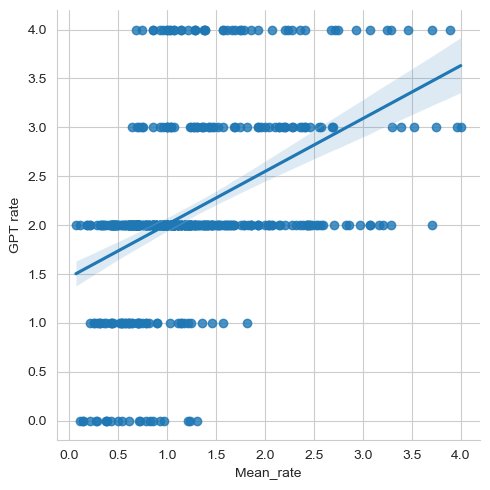

In [157]:
sn.lmplot(data=backward_abbrev_measures, x='Mean_rate', y='GPT rate')

In [164]:
remove_middle = all_words_and_measures[(all_words_and_measures['Mean_rate'] > 2.5) | (all_words_and_measures['Mean_rate'] < 1.5)]
remove_middle.describe().round(decimals=2)

,Class,Mean_rate,SD,N,GPT rate,EAT,Both,LSA,Numletts,Gfrqs,Log_gfrqs,W1frq,W2frq,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,Difference Score
count,785.00,785.00,785.00,785.00,785.00,738.00,780.00,785.00,785.00,785.00,785.00,785.00,785.00,785.00,785.00,785.00,785.00,785.00
mean,-0.02,2.05,0.97,28.34,2.46,0.01,0.02,0.19,9.91,20922.37,3.14,1672.34,1713.05,3385.38,2.89,2.87,5.76,0.97
std,1.00,1.35,0.39,1.14,0.98,0.06,0.06,0.16,2.30,69207.08,1.33,2106.24,2204.45,3056.80,0.59,0.62,0.88,0.66
min,-1.00,0.07,0.00,26.00,0.00,0.00,0.00,-0.03,6.00,0.00,0.00,7.00,9.00,83.00,0.85,0.95,3.21,0.00
25%,-1.00,0.86,0.78,28.00,2.00,0.00,0.00,0.07,8.00,244.00,2.39,321.00,264.00,1152.00,2.51,2.42,5.19,0.52
50%,-1.00,1.36,1.04,28.00,2.00,0.00,0.00,0.15,10.00,1683.00,3.23,793.00,829.00,2229.00,2.90,2.92,5.80,0.93
75%,1.00,3.52,1.25,29.00,3.00,0.00,0.00,0.27,11.00,13195.00,4.12,1905.00,1938.00,4992.00,3.28,3.29,6.39,1.31
max,1.00,4.00,1.70,56.00,4.00,1.00,0.58,0.87,20.00,1109006.00,6.04,8831.00,8831.00,15815.00,3.95,3.95,7.79,3.89


6.940996219447697 0.0


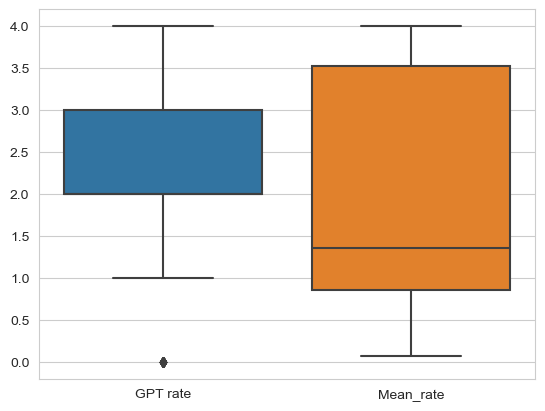

In [161]:
sn.boxplot(data=remove_middle[['GPT rate', 'Mean_rate']],orient='v')
t, p = stats.ttest_ind(remove_middle['GPT rate'], remove_middle['Mean_rate'], permutations=10000, random_state=rng)
print(t, p)

<AxesSubplot:ylabel='Count'>

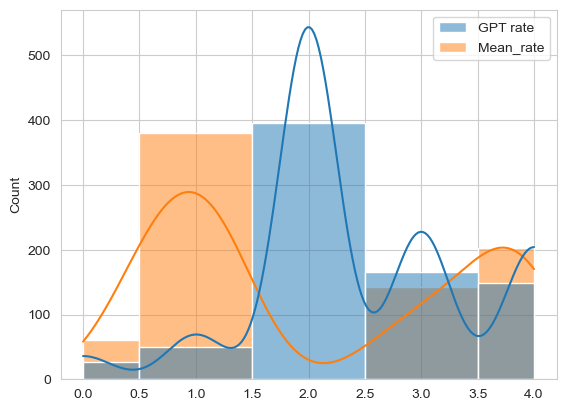

In [165]:
sn.histplot(data=remove_middle[['GPT rate', 'Mean_rate']], bins=[0,.5,1.5,2.5,3.5,4], kde=True)

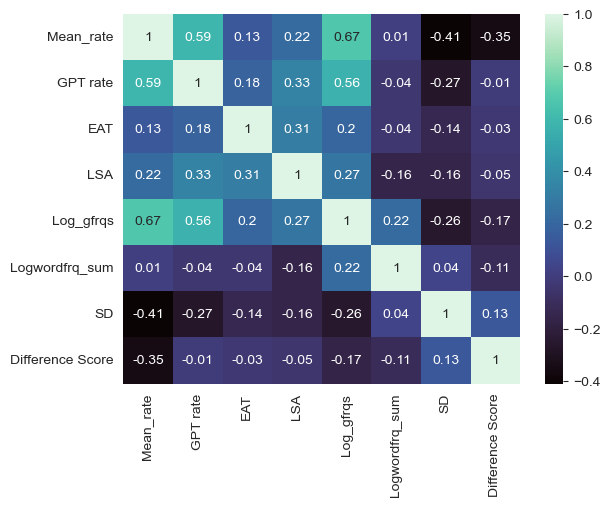

In [167]:
remove_middle_abbrev_measures = remove_middle[['Mean_rate', 'GPT rate', 'EAT', 'LSA', 'USF', 'Log_gfrqs', 'Logwordfrq_sum', 'SD', 'Difference Score']]
remove_middle_corr_mat = remove_middle_abbrev_measures.corr().round(decimals=2)
sn.heatmap(remove_middle_corr_mat, annot=True, cmap='mako')
plt.show()

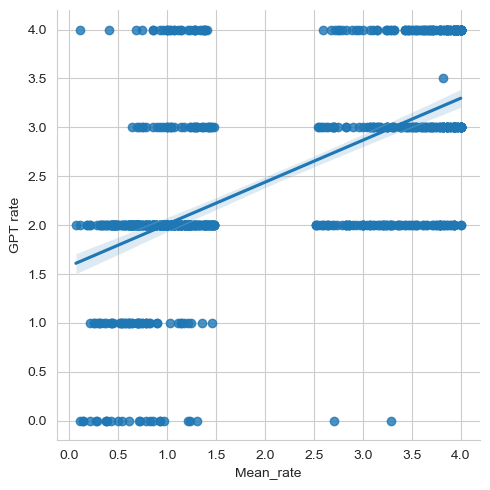

In [169]:
sn.lmplot(data=remove_middle, x='Mean_rate', y='GPT rate')

In [172]:
remove_all_middle_scores = remove_middle[remove_middle['GPT rate'] != 2]
remove_all_middle_scores.describe().round(decimals=2)

,Class,Mean_rate,SD,N,GPT rate,EAT,Both,LSA,Numletts,Gfrqs,Log_gfrqs,W1frq,W2frq,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,Difference Score
count,390.00,390.00,390.00,390.00,390.00,362.00,387.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00
mean,0.29,2.61,0.84,28.36,2.92,0.02,0.02,0.22,10.13,36375.95,3.52,1609.09,1539.86,3148.95,2.86,2.83,5.68,0.81
std,0.96,1.37,0.44,1.51,1.22,0.06,0.07,0.17,2.52,94203.98,1.37,2063.30,2053.57,3032.24,0.61,0.62,0.93,0.83
min,-1.00,0.11,0.00,26.00,0.00,0.00,0.00,-0.03,6.00,0.00,0.00,7.00,9.00,83.00,0.85,0.95,3.21,0.00
25%,-1.00,1.14,0.58,28.00,3.00,0.00,0.00,0.09,8.00,477.00,2.68,268.25,253.00,944.00,2.43,2.40,5.10,0.21
50%,1.00,3.25,0.92,28.00,3.00,0.00,0.00,0.18,10.00,6788.00,3.84,781.00,745.50,1991.00,2.90,2.88,5.73,0.54
75%,1.00,3.86,1.21,29.00,4.00,0.01,0.01,0.31,11.00,34364.75,4.54,1901.25,1874.00,4448.50,3.28,3.27,6.39,0.99
max,1.00,4.00,1.68,56.00,4.00,0.47,0.58,0.87,20.00,1109006.00,6.04,8831.00,8831.00,15815.00,3.95,3.95,7.79,3.89


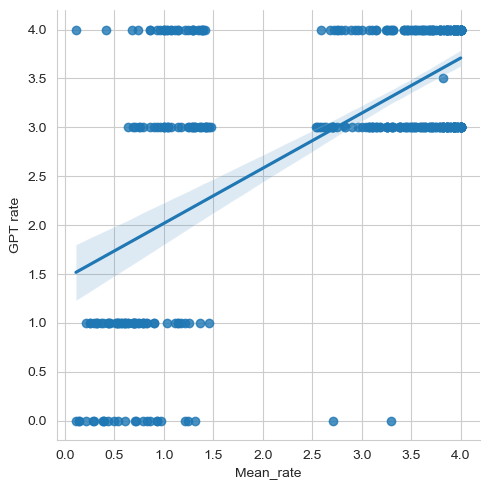

In [174]:
sn.lmplot(data=remove_all_middle_scores, x='Mean_rate', y='GPT rate')

3.421756542381901 0.0009


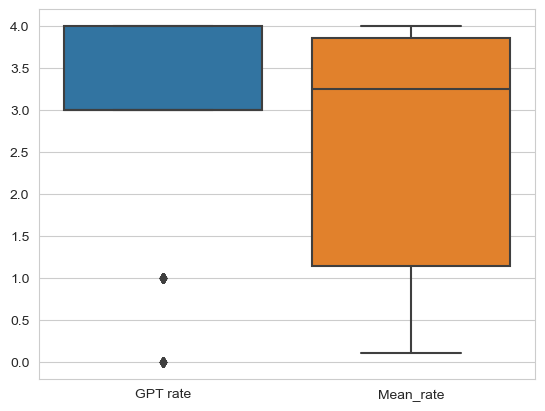

In [176]:
sn.boxplot(data=remove_all_middle_scores[['GPT rate', 'Mean_rate']],orient='v')
t, p = stats.ttest_ind(remove_all_middle_scores['GPT rate'], remove_all_middle_scores['Mean_rate'], permutations=10000, random_state=rng)
print(t, p)

<AxesSubplot:ylabel='Count'>

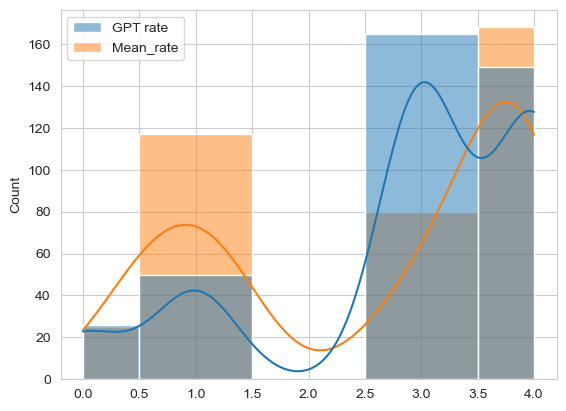

In [178]:
sn.histplot(data=remove_all_middle_scores[['GPT rate', 'Mean_rate']], bins=[0,.5,1.5,2.5,3.5,4], kde=True)

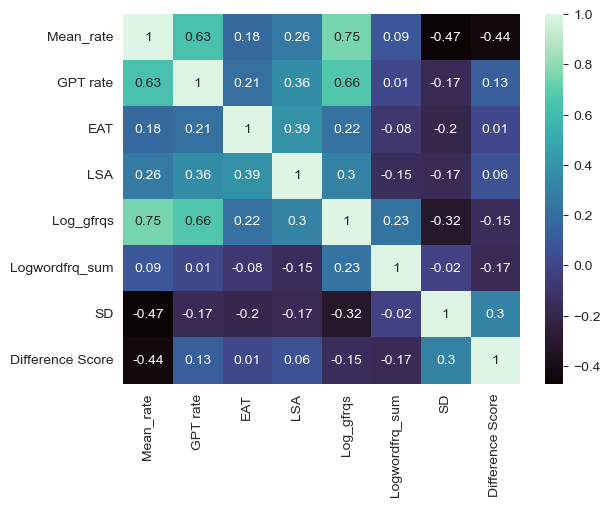

In [180]:
remove_all_middle_abbrev_measures = remove_all_middle_scores[['Mean_rate', 'GPT rate', 'EAT', 'LSA', 'USF', 'Log_gfrqs', 'Logwordfrq_sum', 'SD', 'Difference Score']]
remove_all_middle_corr_mat = remove_all_middle_abbrev_measures.corr().round(decimals=2)
sn.heatmap(remove_all_middle_corr_mat, annot=True, cmap='mako')
plt.show()

In [201]:
#false positives are where GPT said it made sense when humans said it did not make sense
#flase negatives are where GPT said it did not make sense when humans said it did
#true positives are where GPT matched humans in saying that it made sense
#true negatives are where GPT matched humans in saying that it did not make sense

answer_types = [
    (remove_all_middle_scores['GPT rate'] > 2) & (remove_all_middle_scores['Mean_rate'] <= 1.5),
    (remove_all_middle_scores['GPT rate'] < 2) & (remove_all_middle_scores['Mean_rate'] >= 2.5),
    (remove_all_middle_scores['GPT rate'] > 2) & (remove_all_middle_scores['Mean_rate'] >= 2.5),
    (remove_all_middle_scores['GPT rate'] < 2) & (remove_all_middle_scores['Mean_rate'] <= 1.5)
]

answer_names = ['False Positive', 'False Negative', 'True Positive', 'True Negative']

remove_all_middle_scores['Answer Type'] = np.select(answer_types, answer_names)

C:\Users\Nick\AppData\Local\Temp\ipykernel_2320\2809239221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_all_middle_scores['Answer Type'] = np.select(answer_types, answer_names)


<AxesSubplot:xlabel='Answer Type', ylabel='Count'>

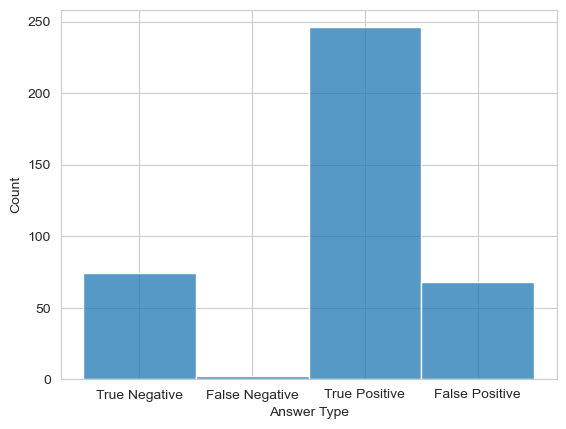

In [203]:
sn.histplot(data=remove_all_middle_scores['Answer Type'])

<AxesSubplot:xlabel='Mean_rate', ylabel='GPT rate'>

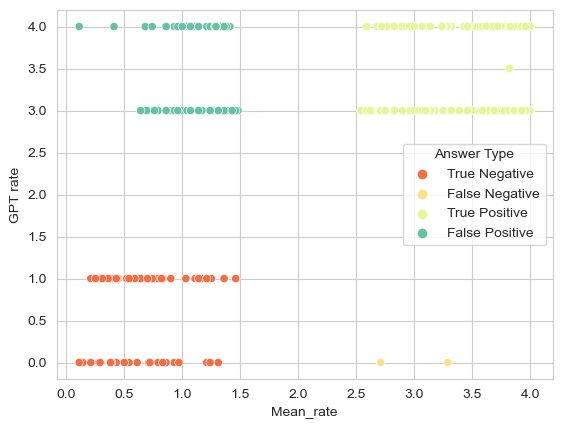

In [198]:
sn.scatterplot(data=remove_all_middle_scores, x='Mean_rate', y='GPT rate', hue='Answer Type', palette='Spectral')